# АДЕКВАТА ПОКА НЕ ПОЛУЧАЕТСЯНАВЕРНОЕ РАЗБИТЬ ПО РАНГАМ ДЛЯ НАЧАЛА

In [1]:
import pandas as pd

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv("freq_dict.csv", sep='\t')

In [3]:
df.head()

,Rank,Lemma,PoS,Freq(ipm),R,D,Doc
0,1,и,conj,35801.8,100,99,37704
1,2,в,pr,31374.2,100,98,37865
2,3,не,part,18028.0,100,97,33999
3,4,на,pr,15867.3,100,98,36748
4,5,я,spro,12684.4,100,95,17116


In [4]:
data = df[['Rank','Freq(ipm)', 'R','D','Doc']]

In [8]:
data.iloc[0]

Rank             1.0
Freq(ipm)    35801.8
R              100.0
D               99.0
Doc          37704.0
Name: 0, dtype: float64

In [37]:
X = np.array(data)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52138 entries, 0 to 52137
Data columns (total 5 columns):
Rank         52138 non-null int64
Freq(ipm)    52138 non-null float64
R            52138 non-null int64
D            52138 non-null int64
Doc          52138 non-null int64
dtypes: float64(1), int64(4)
memory usage: 2.0 MB


{'whiskers': [<matplotlib.lines.Line2D at 0x1a230963c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a228ba400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a23096b70>],
 'medians': [<matplotlib.lines.Line2D at 0x1a22502940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a22502780>],
 'means': []}

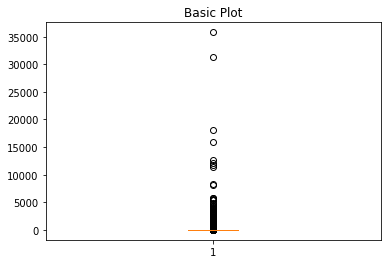

In [11]:
fig1,ax1 = plt.subplots()
ax1.set_title("Basic Plot")
ax1.boxplot(data['Freq(ipm)'])

In [17]:
a = [i*10 for i in range(10)]
print(a)
#np.percentile(data['Freq(ipm)'],[25,75,99])
np.percentile(data['Freq(ipm)'],a)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]


array([ 0.4,  0.5,  0.7,  0.9,  1.3,  1.9,  2.8,  4.3,  7.7, 20. ])

In [18]:
np.percentile(data['Freq(ipm)'],[25,75])

array([0.8, 5.6])

In [9]:
def assign_labels_rank(rank):
    rank = int(rank)
    if (rank < 1000):
        label = "0"
    elif(rank >= 1000 and rank < 5000):
        label = "1"
    elif (rank >= 5000):
        label = "2"
    return label

In [28]:
def assign_labels(freq):
    #print("sd")
    freq = float(freq)
    if (freq < 0.8):
        label = "2"
    elif(freq >= 0.8 and freq < 5.6):
        label = "1"
    elif (freq >= 5.6):
        label = "0"
    return label

In [10]:
df["freq_lable"] = df['Rank'].apply(assign_labels_rank)
df.head()

,Rank,Lemma,PoS,Freq(ipm),R,D,Doc,freq_lable
0,1,и,conj,35801.8,100,99,37704,0
1,2,в,pr,31374.2,100,98,37865,0
2,3,не,part,18028.0,100,97,33999,0
3,4,на,pr,15867.3,100,98,36748,0
4,5,я,spro,12684.4,100,95,17116,0


In [11]:
df_output = df[['Lemma','PoS','freq_lable']]

In [12]:
df_output.to_csv('freq_lables.csv')

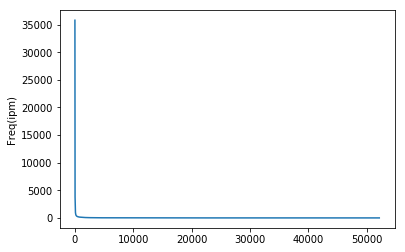

In [5]:
plt.plot(data['Freq(ipm)'])
plt.ylabel('Freq(ipm)')
plt.show()

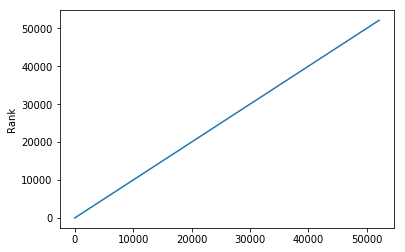

In [6]:
plt.plot(data['Rank'])
plt.ylabel('Rank')
plt.show()

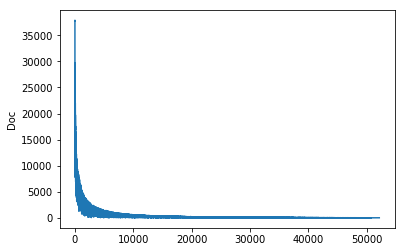

In [7]:
plt.plot(data['Doc'])
plt.ylabel('Doc')
plt.show()

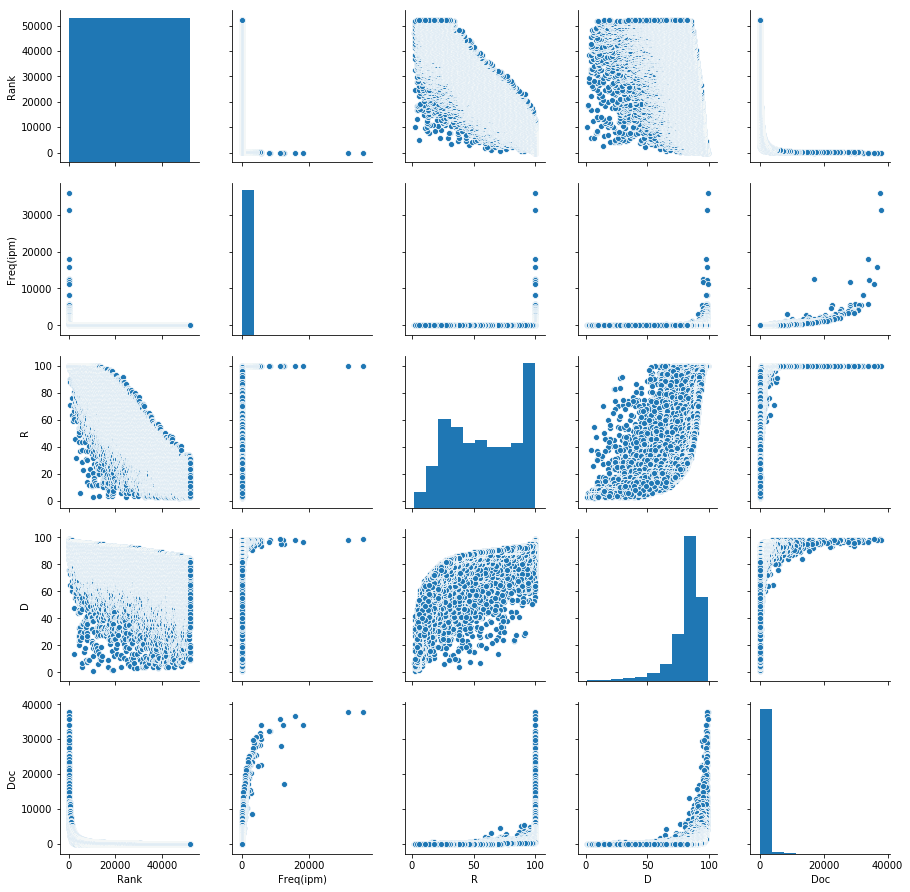

In [9]:
sns.pairplot(df)


# KMEANS

In [12]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [13]:
kmeans.labels_

array([2, 2, 2, ..., 0, 0, 0])

In [14]:
kmeans.cluster_centers_

array([[  4.69020000e+04,   4.91358732e-01,   2.47997708e+01,
          7.31439893e+01,   3.17184188e+01],
       [  1.54929818e+04,   4.68195567e+00,   7.85828022e+01,
          8.57944450e+01,   2.53379150e+02],
       [  5.11851866e+03,   8.51022274e+01,   9.50916374e+01,
          8.99151036e+01,   1.74384799e+03],
       [  2.59805000e+04,   1.94574651e+00,   5.92449818e+01,
          8.29411202e+01,   1.17134296e+02],
       [  3.64385000e+04,   9.39162043e-01,   3.99029080e+01,
          7.86734264e+01,   5.99008035e+01]])

In [21]:
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [22]:
for k in range (1, 11):
 
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_

    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)

k: 1  cost: 1.1918287675e+13
k: 2  cost: 3.0525958464e+12
k: 3  cost: 1.40651634691e+12
k: 4  cost: 827633999565.0
k: 5  cost: 557818497521.0
k: 6  cost: 409711089993.0
k: 7  cost: 319267653955.0
k: 8  cost: 259494137208.0
k: 9  cost: 213232933888.0
k: 10  cost: 174061728399.0


In [23]:
from sklearn.preprocessing import StandardScaler

In [28]:
X_stand = StandardScaler().fit_transform(X)

In [38]:
X_stand[0]

array([  -1.73201759,  124.70822328,    1.45086301,    1.35899923,
         26.50576157])

In [30]:
for k in range (1, 11):
 
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X_stand)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_

    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)

k: 1  cost: 260690.0
k: 2  cost: 166128.064754
k: 3  cost: 125306.19646
k: 4  cost: 98728.1960658
k: 5  cost: 74649.9702552
k: 6  cost: 60564.8489802
k: 7  cost: 47452.7927222
k: 8  cost: 41478.6215447
k: 9  cost: 35369.7754673
k: 10  cost: 31106.7544125


# PCA

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_stand)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [41]:
data.head()

,Rank,Freq(ipm),R,D,Doc
0,1,35801.8,100,99,37704
1,2,31374.2,100,98,37865
2,3,18028.0,100,97,33999
3,4,15867.3,100,98,36748
4,5,12684.4,100,95,17116


In [55]:
freq_med = data['Freq(ipm)'].median()
freq_quan = data['Freq(ipm)'].quantile([.3,.6,.9])
freq_quan

0.3     0.9
0.6     2.8
0.9    20.0
Name: Freq(ipm), dtype: float64

In [56]:
def set_target_freq(freq_value):
    #if freq_value <= 0.9:
        #label = "<=0.9"
    if freq_value <= 2.8:
        label = "<=2.8"
    elif freq_value > 2.8 and freq_value <= 20.0:
        label = "2.8-20"
    elif freq_value > 20.0:
        label = ">20.0"
    return label

In [59]:
data['target'] = data['Freq(ipm)'].apply(set_target_freq)

In [68]:
finalDf = pd.concat([principalDf, data['target']], axis = 1)

In [69]:
finalDf.head()

,principal component 1,principal component 2,target
0,38.614703,104.330490,>20.0
1,35.395957,93.170202,>20.0
2,24.577438,57.793053,>20.0
3,23.788775,53.355067,>20.0
4,16.001888,37.692112,>20.0


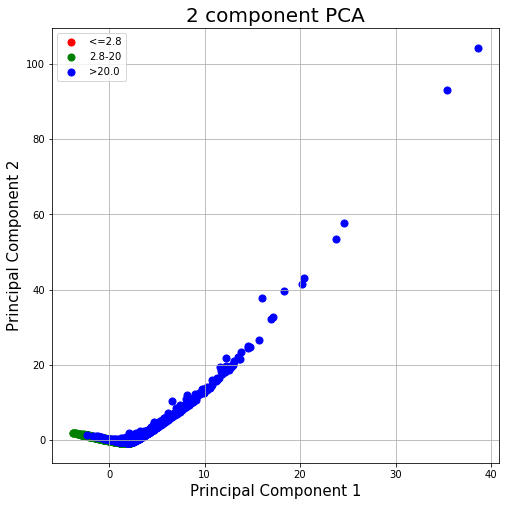

In [81]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["<=2.8", "2.8-20", ">20.0"]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

In [82]:
import seaborn as sns

In [85]:
sns.FacetGrid(df, hue="target").map(plt.scatter, "X", "Y").add_legend()

KeyError: 'target'